<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema2_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 2.2

##  Explorando BDSICE: Base de datos de Series de Indicadores de Coyuntura Económica

El Ministerio de Economía mantiene una base de datos con series de coyuntura económica, fundamentalmente española. En total en esta base están disponibles unas 14.500 series sobre distintos aspectos de la economía española.

  * Accesible aquí: [BDSICE](https://serviciosede.mineco.gob.es/Indeco/BDSICE/HomeBDSICE.aspx)

### 1. Importación de librerías a usar

In [1]:
# Importamos librerias y establecemos algunas opciones
import pandas as pd
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt


### 2. Importación de series económicas y procesamiento de los datos

* Dentro de la página de [BDSICE](https://serviciosede.mineco.gob.es/Indeco/BDSICE/HomeBDSICE.aspx), hacemos clic en "Consulta y descarga de series".  
* Procedemos a descargar la tasa de paro por nivel de estudios. Para eso, hacemos click en "1 Mercado Laboral", luego en "14 Parados EPA" y entonces seleccionamos las series:

| Disponibilidad | Código serie | Nombre de serie |
| ---------------| ------------ | ----------------|
| 01/2002 - 02/2023 |	 143035 | 	TASA DE PARO. NIVEL DE ESTUDIOS: SUPERIORES |
|01/2002 - 02/2023	| 143036 	| TASA DE PARO. NIVEL DE ESTUDIOS: ANALFABETOS Y PRIMARIOS|
|01/2002 - 02/2023|	 143037 	|TASA DE PARO. NIVEL DE ESTUDIOS: SECUNDARIOS|

* Posteriormente, clicamos en descargar, con formato Excel.
* Como ya sabemos algo de Python y, además, vamos a repetir varias veces el proceso de importación de datos, el procesamiento de los datos de la descarga lo vamos a hacer en Python en lugar de en Excel.
* No obstante, antes de subir los datos a Google Colab, hay que abrir el archivo que hemos descargado y guardarlo como archivo Excel (por defecto, se guarda como csv).

In [ ]:
# 1. Importar datos (recordad primero subir los datos a Google Colab)
data=pd.read_excel("DescargaSeries_202309290418.xlsx")
data


In [ ]:
# 2. Eliminamos la primera fila
data.drop(0, inplace=True)
data

In [ ]:
# 3. Preparamos la columna con la fecha (trimestre)

# 3.1. Primero convierto los datos en string
data['trim']=data['SERIES'].astype('str')

# 3.2. Extraemos los 4 primeros dígitos, añadimos una Q y añadimos el último dígito
data['trim']=data['trim'].str[:4]+"Q"+data['trim'].str[-1:]
data

In [ ]:
# 4. Convertimos la columna en datatime, para que Python la interprete como fecha
data['trim']=pd.to_datetime(data['trim'])
data

In [ ]:
# 5. Ahora se establece la columna trim como index de la tabla
data.set_index("trim", inplace=True)
data

In [24]:
# 6. Renombramos las columnas
data.rename(columns={
    "TASA DE PARO. NIVEL DE ESTUDIOS: SUPERIORES":"tp_sup",
    "TASA DE PARO. NIVEL DE ESTUDIOS: ANALFABETOS Y PRIMARIOS":"tp_pri",
    "TASA DE PARO. NIVEL DE ESTUDIOS: SECUNDARIOS":"tp_sec"}, inplace=True)
data

In [ ]:
# 7. Borramos las columnas innecesarias
data.drop(columns="SERIES", inplace=True)
data

### 2. Visualización de los datos



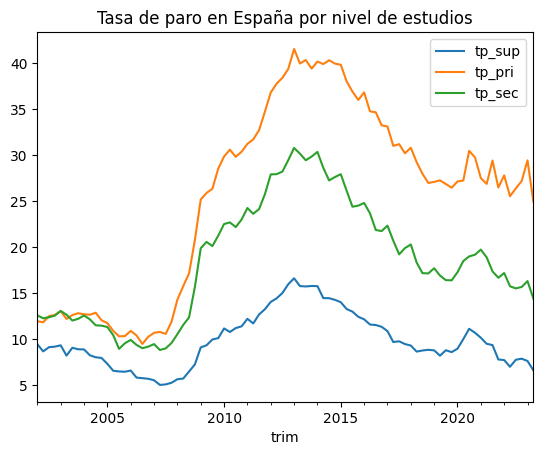

In [35]:
data.plot(title="Tasa de paro en España por nivel de estudios")
plt.show()

In [ ]:
# El número de observaciones (filas en la tabla) por año
pwt['year'].value_counts() # ¡La función value_counts() es muy útil!

In [ ]:
# Dimensiones de la base de datos:
print(pwt.shape) # filas x columnas

(12810, 52)


### 2. Ejercicio
1. Crear una tabla con los datos de España y su población (observar que pop es la columna con los datos de población).
2. Representar gráficamente la evolución de la población en España.
3. Calcular la tasa de variación anual de la población en España y representarlo gráficamente.
4.  Hacer lo mismo que en los tres puntos anteriores pero con Italia.
5. Calcular la media del crecimiento de la población en España e Italia, es decir, calcular la media de la tasa de variación anual durante todo el periodo (1950-2019).  Pista: usar la función ```.mean```
6. Representar gráficamente la evolución de la población en ambos países. Hacer lo mismo con sus tasas de variación.
7. Por otra parte, en relación al crecimiento del PIB, ¿qué país ha crecido más? Usar la variable “rgdpo” (ver la hoja “Legend” del archivo Excel). Representar también gráficamente el crecimiento del PIB de ambos países durante el periodo 1950-2019.

In [ ]:
# 1. Tabla con los datos de España y su población
spain=pwt.query("country=='Spain'")
spain_pop=spain[['year','pop']]
spain_pop.set_index("year", inplace=True)
spain_pop

In [ ]:
# 2 Representar gráficamente la evolución de la población en España.
spain_pop.plot(title="Evolución de la población en España")

In [ ]:
# 3 Calcular la tasa de variación anual de la población en España y representarlo gráficamente.
#spain_pop_tv=spain_pop.diff()/spain_pop.shift()
spain_pop_tv=spain_pop/spain_pop.shift()-1
spain_pop_tv.plot()

In [ ]:
# 4. Creamos tablas para Italia
italy=pwt.query("country=='Italy'")
italy_pop=italy[['year','pop']]
italy_pop.set_index("year", inplace=True)
italy_pop_tv=italy_pop.diff()/italy_pop.shift()

In [ ]:
# Evolución de la población en Italia
italy_pop.plot(title="Evolución de la población en Italia")

In [ ]:
# Tasa de variación de la población en Italia
italy_pop_tv.plot(title="Crecimiento de la población en Italia")

In [ ]:
# 5. Calcular la media del crecimiento de la población en España e Italia
pop_sp_it_tv=spain_pop_tv.merge(italy_pop_tv, on='year')
pop_sp_it_tv.rename(columns={"pop_x":"Spain","pop_y":"Italy"}, inplace=True)
medias_tot=pop_sp_it_tv.mean()
medias_tot.plot.bar()

In [ ]:
# 6. Representar gráficamente la evolución de la población en ambos países
fig,ax=plt.subplots()
ax.plot(spain_pop, label="España")
ax.plot(italy_pop, label="Italia")
ax.legend()
plt.show()

In [ ]:
# Ahora, las tasas de variación
fig,ax=plt.subplots()
ax.plot(spain_pop_tv, label="Spain")
ax.plot(italy_pop_tv, label="Italia")
ax.legend()
plt.show()

In [ ]:
# 7. ¿Qué país ha crecido más en términos de PIB (rgdpo)?
# Representar gráficamente el crecimiento del PIB de ambos países durante el periodo 1950-2019.
spain_pib=pwt.loc[pwt['country']=="Spain",["year","rgdpo"]]
spain_pib.set_index("year", inplace=True)
italy_pib=pwt.loc[pwt['country']=="Italy",["year","rgdpo"]]
italy_pib.set_index("year", inplace=True)
pib=spain_pib.merge(italy_pib, on="year")
pib.rename(columns={"rgdpo_x":"Spain","rgdpo_y":"Italy"}, inplace=True)
pib_tv=pib.diff()/pib.shift()
pib_tv.plot()


In [ ]:
#¿Qué país ha crecido más?
pib_tv.mean().plot.bar()

### Ejercicios adicionales:

1. Analizar para UK, Alemania, Francia, Italia y España cómo ha evolucionado el human capital index ("hc"), el número medio de horas trabajadas ("avh") y el peso del gasto público en el PIB ("csh_g").
Realizar el análisis simplemente a través de la representación gráfica de las series de datos.

2. Crear una función que devuelve el valor medio de un indicador de la tabla Penn World Table para un país determinado y un periodo determinado. Se trata de una función que debe tomar cuatro argumentos: 1) la variable macroeconómica, 2) el país, 3) el año inicial del periodo, 4) el año final del periodo. Como pista, la función puede tener esta estructura:

```python
def valor_medio(indicador, pais, añoinicial, añofinal):
  '''
 Calcula el valor medio de un indicador para un país y periodo concreto. Se da por hecho que la tabla a consultar se denomina pwt
  '''
  consulta=pwt[pwt.country==pais] # Selecciona el país
  consulta=...                    # Selecciona el periodo
  vmedio= ... # Calcula el valor medio
  return vmedio
```